# Data Acquisition

In [42]:
import pystac_client
import planetary_computer

In [43]:
catalog = pystac_client.Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,
)

In [82]:
time_range = "2020-12-01/2020-12-31"
bbox = [36.187591552734375, 41.372171203017984, 36.187591552734375, 41.372171203017984]

search = catalog.search(collections=["landsat-c2-l2"], bbox=bbox, datetime=time_range)
items = search.get_all_items()
len(items)

8

In [47]:
len(items)

8

In [83]:
import geopandas

df = geopandas.GeoDataFrame.from_features(items.to_dict(), crs="epsg:4326")
df

,geometry,gsd,created,sci:doi,datetime,platform,proj:epsg,proj:shape,description,instruments,...,landsat:wrs_row,landsat:scene_id,landsat:wrs_path,landsat:wrs_type,view:sun_azimuth,landsat:correction,view:sun_elevation,landsat:cloud_cover_land,landsat:collection_number,landsat:collection_category
0,"POLYGON ((35.79202 42.73829, 38.12942 42.40143...",30,2022-05-06T17:43:42.535583Z,10.5066/P9C7I13B,2020-12-29T07:33:10.151165Z,landsat-7,32637,"[7351, 8361]",Landsat Collection 2 Level-2,[etm+],...,031,LE71750312020364NSG00,175,2,150.354739,L2SP,19.145836,13.00,02,T1
1,"POLYGON ((34.45522 42.81182, 36.66371 42.40748...",30,2022-05-06T18:03:35.113794Z,10.5066/P9OGBGM6,2020-12-28T08:20:58.613181Z,landsat-8,32636,"[7761, 7641]",Landsat Collection 2 Level-2,"[oli, tirs]",...,031,LC81760312020363LGN00,176,2,160.232930,L2SP,22.430204,92.25,02,T1
2,"POLYGON ((35.99552 42.81189, 38.20371 42.4071,...",30,2022-05-06T17:36:23.166908Z,10.5066/P9OGBGM6,2020-12-21T08:14:49.559076Z,landsat-8,32637,"[8001, 7881]",Landsat Collection 2 Level-2,"[oli, tirs]",...,031,LC81750312020356LGN00,175,2,161.117937,L2SP,22.463107,99.97,02,T2
3,"POLYGON ((34.25087 42.74048, 36.5909 42.40276,...",30,2022-05-06T18:04:52.588077Z,10.5066/P9C7I13B,2020-12-20T07:39:58.918464Z,landsat-7,32636,"[7081, 8121]",Landsat Collection 2 Level-2,[etm+],...,031,LE71760312020355NSG00,176,2,151.589626,L2SP,19.382592,33.00,02,T1
4,"POLYGON ((35.78368 42.73671, 38.12835 42.3998,...",30,2022-05-06T17:43:42.382332Z,10.5066/P9C7I13B,2020-12-13T07:34:20.280972Z,landsat-7,32637,"[7351, 8371]",Landsat Collection 2 Level-2,[etm+],...,031,LE71750312020348NSG00,175,2,152.376994,L2SP,19.963729,92.00,02,T1
5,"POLYGON ((34.45119 42.81187, 36.65931 42.40708...",30,2022-05-06T18:03:34.952170Z,10.5066/P9OGBGM6,2020-12-12T08:21:01.640920Z,landsat-8,32636,"[7761, 7641]",Landsat Collection 2 Level-2,"[oli, tirs]",...,031,LC81760312020347LGN00,176,2,162.091786,L2SP,23.034279,100.00,02,T2
6,"POLYGON ((35.99662 42.81192, 38.20444 42.40738...",30,2022-05-06T17:36:23.017672Z,10.5066/P9OGBGM6,2020-12-05T08:14:51.006138Z,landsat-8,32637,"[8001, 7891]",Landsat Collection 2 Level-2,"[oli, tirs]",...,031,LC81750312020340LGN00,175,2,162.671331,L2SP,23.869152,0.73,02,T1
7,"POLYGON ((34.2373 42.74009, 36.57629 42.40214,...",30,2022-05-06T18:04:52.438763Z,10.5066/P9C7I13B,2020-12-04T07:41:11.608453Z,landsat-7,32636,"[7071, 8121]",Landsat Collection 2 Level-2,[etm+],...,031,LE71760312020339NSG00,176,2,153.092292,L2SP,21.167883,5.00,02,T1


In [84]:
selected_item = min(items, key=lambda item: item.properties["eo:cloud_cover"])
print(selected_item)

<Item id=LE07_L2SP_176031_20201204_02_T1>


In [85]:
import rich.table

table = rich.table.Table("Asset Key", "Description")
for asset_key, asset in selected_item.assets.items():
    table.add_row(asset_key, asset.title)

table

┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Asset Key        ┃ Description                                                      ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ qa               │ Surface Temperature Quality Assessment Band                      │
│ ang              │ Angle Coefficients File                                          │
│ red              │ Red Band                                                         │
│ blue             │ Blue Band                                                        │
│ drad             │ Downwelled Radiance Band                                         │
│ emis             │ Emissivity Band                                                  │
│ emsd             │ Emissivity Standard Deviation Band                               │
│ lwir             │ Surface Temperature Band                                         │
│ trad             │ Thermal Radiance Band                                            │
│ urad             │ Upwelled Radiance Band                                           │
│ atran            │ Atmospheric Transmittance Band                                   │
│ cdist            │ Cloud Distance Band                                              │
│ green            │ Green Band                                                       │
│ nir08            │ Near Infrared Band 0.8                                           │
│ swir16           │ Short-wave Infrared Band 1.6                                     │
│ swir22           │ Short-wave Infrared Band 2.2                                     │
│ mtl.txt          │ Product Metadata File (txt)                                      │
│ mtl.xml          │ Product Metadata File (xml)                                      │
│ cloud_qa         │ Cloud Quality Assessment Band                                    │
│ mtl.json         │ Product Metadata File (json)                                     │
│ qa_pixel         │ Pixel Quality Assessment Band                                    │
│ qa_radsat        │ Radiometric Saturation and Dropped Pixel Quality Assessment Band │
│ atmos_opacity    │ Atmospheric Opacity Band                                         │
│ tilejson         │ TileJSON with default rendering                                  │
│ rendered_preview │ Rendered preview                                                 │
└──────────────────┴──────────────────────────────────────────────────────────────────┘

In [98]:
selected_item.assets["rendered_preview"].to_dict()

{'href': 'https://planetarycomputer.microsoft.com/api/data/v1/item/preview.png?collection=landsat-c2-l2&item=LE07_L2SP_176031_20201204_02_T1&assets=red&assets=green&assets=blue&color_formula=gamma+RGB+2.7%2C+saturation+1.5%2C+sigmoidal+RGB+15+0.55&format=png',
 'type': 'image/png',
 'title': 'Rendered preview',
 'rel': 'preview',
 'roles': ['overview']}

In [99]:
from IPython.display import Image

Image(url=selected_item.assets["rendered_preview"].href, width=500)

In [100]:
selected_item.assets["nir08"].href[:250]

'https://landsateuwest.blob.core.windows.net/landsat-c2/level-2/standard/etm/2020/176/031/LE07_L2SP_176031_20201204_20201230_02_T1/LE07_L2SP_176031_20201204_20201230_02_T1_SR_B4.TIF?st=2024-10-05T04%3A52%3A00Z&se=2024-10-06T05%3A37%3A00Z&sp=rl&sv=2024'

In [101]:
import requests

requests.head(selected_item.assets["cdist"].href).status_code

200

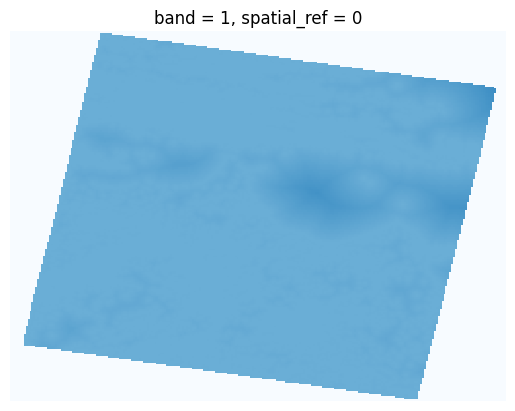

In [106]:
# import xarray as xr
import rioxarray

ds = rioxarray.open_rasterio(
    selected_item.assets["cdist"].href, overview_level=4
).squeeze()
img = ds.plot(cmap="Blues", add_colorbar=False)
img.axes.set_axis_off();

In [ ]:
!pip install stackstac

In [57]:
import stackstac

ds = stackstac.stack(items)
ds

<xarray.DataArray 'stackstac-aebf60398089c1b426bcb167382f12c8' (time: 8,
                                                                band: 22,
                                                                y: 7972,
                                                                x: 12372)> Size: 139GB
dask.array<fetch_raster_window, shape=(8, 22, 7972, 12372), dtype=float64, chunksize=(1, 1, 1024, 1024), chunktype=numpy.ndarray>
Coordinates: (12/31)
  * time                         (time) datetime64[ns] 64B 2020-12-04T19:02:1...
    id                           (time) <U31 992B 'LC08_L2SP_047027_20201204_...
  * band                         (band) <U13 1kB 'qa' 'red' ... 'atmos_opacity'
  * x                            (x) float64 99kB 3.339e+05 ... 7.05e+05
  * y                            (y) float64 64kB 5.374e+06 ... 5.135e+06
    instruments                  (time) object 64B ['oli', 'tirs'] ... ['oli'...
    ...                           ...
    raster:bands                 (band) object 176B {'unit': 'kelvin', 'scale...
    classification:bitfields     (band) object 176B None None ... None
    common_name                  (band) object 176B None None None ... None None
    center_wavelength            (band) object 176B None None None ... None None
    full_width_half_max          (band) object 176B None None None ... None None
    epsg                         int64 8B 32610
Attributes:
    spec:        RasterSpec(epsg=32610, bounds=(333870.0, 5135070.0, 705030.0...
    crs:         epsg:32610
    transform:   | 30.00, 0.00, 333870.00|\n| 0.00,-30.00, 5374230.00|\n| 0.0...
    resolution:  30.0

In [58]:
time_range = "2020-12-01/2020-12-31"
bbox = [-122.2751, 47.5469, -121.9613, 47.7458]

search = catalog.search(
    collections=["sentinel-2-l2a"],
    bbox=bbox,
    datetime=time_range,
    query={"eo:cloud_cover": {"lt": 20}},
)
items = search.get_all_items()

/usr/local/lib/python3.10/dist-packages/pystac_client/item_search.py:851: FutureWarning: get_all_items() is deprecated, use item_collection() instead.
  warnings.warn(


In [59]:
search = catalog.search(
    collections=["goes-cmi"],
    bbox=[-67.2729, 25.6000, -61.7999, 27.5423],
    datetime=["2018-09-11T13:00:00Z", "2018-09-11T15:40:00Z"],
    query={"goes:image-type": {"eq": "MESOSCALE"}},
)

# Analyzing STAC Metadata

In [ ]:
!pip install contextily

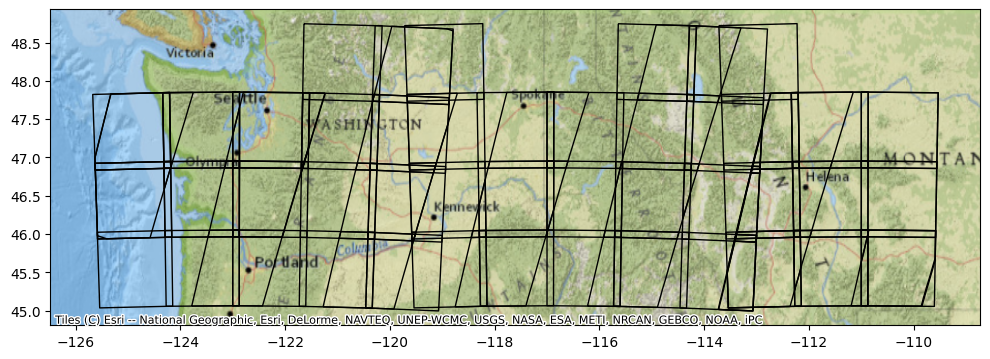

In [62]:
import contextily

search = catalog.search(
    collections=["sentinel-2-l2a"],
    bbox=[-124.2751, 45.5469, -110.9613, 47.7458],
    datetime="2020-12-26/2020-12-31",
)
items = search.item_collection()

df = geopandas.GeoDataFrame.from_features(items.to_dict(), crs="epsg:4326")

ax = df[["geometry", "datetime", "s2:mgrs_tile", "eo:cloud_cover"]].plot(
    facecolor="none", figsize=(12, 6)
)
contextily.add_basemap(
    ax, crs=df.crs.to_string(), source=contextily.providers.Esri.NatGeoWorldMap
);

In [ ]:
import pandas as pd

search = catalog.search(
    collections=["sentinel-2-l2a"],
    bbox=[-124.2751, 45.5469, -123.9613, 45.7458],
    datetime="2020-01-01/2020-12-31",
)
items = search.get_all_items()
df = geopandas.GeoDataFrame.from_features(items.to_dict())
df["datetime"] = pd.to_datetime(df["datetime"])

ts = df.set_index("datetime").sort_index()["eo:cloud_cover"].rolling(7).mean()
ts.plot(title="eo:cloud-cover (7-scene rolling average)");

In [64]:
import pandas as pd

landsat = catalog.get_collection("landsat-c2-l2")

pd.DataFrame(landsat.summaries.get_list("eo:bands"))

,name,common_name,description,center_wavelength,full_width_half_max
0,TM_B1,blue,Visible blue (Thematic Mapper),0.49,0.07
1,TM_B2,green,Visible green (Thematic Mapper),0.56,0.08
2,TM_B3,red,Visible red (Thematic Mapper),0.66,0.06
3,TM_B4,nir08,Near infrared (Thematic Mapper),0.83,0.14
4,TM_B5,swir16,Short-wave infrared (Thematic Mapper),1.65,0.20
5,TM_B6,lwir,Long-wave infrared (Thematic Mapper),11.45,2.10
6,TM_B7,swir22,Short-wave infrared (Thematic Mapper),2.22,0.27
7,ETM_B1,blue,Visible blue (Enhanced Thematic Mapper Plus),0.48,0.07
8,ETM_B2,green,Visible green (Enhanced Thematic Mapper Plus),0.56,0.08
9,ETM_B3,red,Visible red (Enhanced Thematic Mapper Plus),0.66,0.06


In [65]:
pd.DataFrame.from_dict(landsat.extra_fields["item_assets"], orient="index")[
    ["title", "description", "gsd"]
]

,title,description,gsd
qa,Surface Temperature Quality Assessment Band,Collection 2 Level-2 Quality Assessment Band (...,NaN
ang,Angle Coefficients File,Collection 2 Level-1 Angle Coefficients File,NaN
red,Red Band,NaN,NaN
blue,Blue Band,NaN,NaN
drad,Downwelled Radiance Band,Collection 2 Level-2 Downwelled Radiance Band ...,NaN
emis,Emissivity Band,Collection 2 Level-2 Emissivity Band (ST_EMIS)...,NaN
emsd,Emissivity Standard Deviation Band,Collection 2 Level-2 Emissivity Standard Devia...,NaN
lwir,Surface Temperature Band,Collection 2 Level-2 Thermal Infrared Band (ST...,NaN
trad,Thermal Radiance Band,Collection 2 Level-2 Thermal Radiance Band (ST...,NaN
urad,Upwelled Radiance Band,Collection 2 Level-2 Upwelled Radiance Band (S...,NaN


In [66]:
collection = catalog.get_collection("daymet-daily-na")
print(collection)

<CollectionClient id=daymet-daily-na>


In [67]:
asset = collection.assets["zarr-abfs"]
print(asset)

<Asset href=abfs://daymet-zarr/daily/na.zarr>


# Model